# Getting Started with EDA-Schema

This tutorial introduces **EDA-Schema**, a property graph data model schema designed to represent digital circuit designs and their attributes. The tutorial outlines the core features and functionalities of EDA-Schema, supplemented by hands-on examples to demonstrate its practical usage.

EDA-Schema standardizes graph structures and feature sets for digital circuits, utilizing data from the IWLS'05 benchmark circuit suite and the Skywater 130 nm Process Design Kit (PDK). The dataset includes physical designs generated using the open-source toolset OpenROAD.

This tutorial covers:
1. An introduction to EDA-Schema.
2. Techniques for working with the provided open dataset.
3. Methods for representing and analyzing digital circuits using the property graph data model.

---

## Setting Up the Environment

This section details the process of importing the required libraries and creating the dataset object necessary for utilizing EDA-Schema. These steps establish the environment and connect to the database and file system where the dataset is stored.

### Importing Libraries

The tutorial begins by importing libraries essential for data manipulation, visualization, and interaction with EDA-Schema.

In [1]:
import os
import itertools

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from eda_schema.dataset import Dataset
from eda_schema.db import SQLitePickleDB

import warnings
warnings.filterwarnings('ignore')

#### Creating the Dataset Object

The first step involves creating an instance of the `SQLitePickleDB` class, which establishes a connection to the database and file system containing the dataset.

Subsequently, a `Dataset` object is instantiated to facilitate interaction with the dataset.

With these steps completed, the environment is configured and ready for exploring and analyzing digital circuit designs using EDA-Schema.

In [2]:
DATASET_DIR = "../dataset/dataset_openroad_sky130hd_iwls05_v1.1"
dataset = Dataset(SQLitePickleDB(DATASET_DIR))

### Loading a Netlist

A netlist, identified by attributes such as the circuit name, netlist ID, and design phase, is loaded from the database into an EDA-schema netlist graph object to extract specific details about the digital circuit. A snapshot of the netlist can be extracted in the following design stages/phases.

- Post floorplan: floorplan
- Post global placement: global_placement
- Post detailed placement: detailed_placement
- Post CTS: cts
- Post global routing: global_route
- Post detailed routing: detailed_route

In [3]:
plt.figure(figsize=(20, 10))
dataset.load_dataset(circuit="i2c", netlist_id='id-000001', phase="detailed_route")
netlist = dataset[('i2c', 'id-000001', 'detailed_route')]

<Figure size 1440x720 with 0 Axes>

Once the netlist is loaded, various attributes can be accessed to get detailed information about the digital circuit.

- **Width**: The width of the circuit.
- **Height**: The height of the circuit.
- **Number of inputs**: The number of input pins in the circuit.
- **Number of outputs**: The number of output pins in the circuit.
- **Cell Density**: The density of cells (components) in the circuit.
- **Pin Density**: The density of pins in the circuit.
- **Net Density**: The density of nets (connections) in the circuit.

These attributes provide a comprehensive overview of the circuit's physical and structural properties, enabling further analysis and optimization.

In [4]:
print("Width:", netlist.width)
print("Height:", netlist.height)
print("Number of inputs:", netlist.no_of_inputs)
print("Number of outputs:", netlist.no_of_outputs)
print("Cell Density:", netlist.cell_density)
print("Pin Density:", netlist.pin_density)
print("Net Density:", netlist.net_density)

Width: 190.415
Height: 190.415
Number of inputs: 19
Number of outputs: 14
Cell Density: 0.13438644688644688
Pin Density: 0.29750457875457875
Net Density: 0.08333333333333333


### Exploring Netlist Graph Entities

A netlist graph in EDA-schema includes inputs, outputs, gates, and interconnects. Each entity type provides specific details about the digital circuit's structure and properties. It can be iterated to access and analyze individual circuit components.

In [5]:
for node in netlist:
    print(f"Node: {node} ({netlist.nodes[node]['type']})")

Node: arst_i (IO_PORT)
Node: scl_pad_i (IO_PORT)
Node: scl_pad_o (IO_PORT)
Node: scl_padoen_o (IO_PORT)
Node: sda_pad_i (IO_PORT)
Node: sda_pad_o (IO_PORT)
Node: sda_padoen_o (IO_PORT)
Node: wb_ack_o (IO_PORT)
Node: wb_adr_i_0_ (IO_PORT)
Node: wb_adr_i_1_ (IO_PORT)
Node: wb_adr_i_2_ (IO_PORT)
Node: wb_clk_i (IO_PORT)
Node: wb_cyc_i (IO_PORT)
Node: wb_dat_i_0_ (IO_PORT)
Node: wb_dat_i_1_ (IO_PORT)
Node: wb_dat_i_2_ (IO_PORT)
Node: wb_dat_i_3_ (IO_PORT)
Node: wb_dat_i_4_ (IO_PORT)
Node: wb_dat_i_5_ (IO_PORT)
Node: wb_dat_i_6_ (IO_PORT)
Node: wb_dat_i_7_ (IO_PORT)
Node: wb_dat_o_0_ (IO_PORT)
Node: wb_dat_o_1_ (IO_PORT)
Node: wb_dat_o_2_ (IO_PORT)
Node: wb_dat_o_3_ (IO_PORT)
Node: wb_dat_o_4_ (IO_PORT)
Node: wb_dat_o_5_ (IO_PORT)
Node: wb_dat_o_6_ (IO_PORT)
Node: wb_dat_o_7_ (IO_PORT)
Node: wb_inta_o (IO_PORT)
Node: wb_rst_i (IO_PORT)
Node: wb_stb_i (IO_PORT)
Node: wb_we_i (IO_PORT)
Node: net31 (INTERCONNECT)
Node: FILLER_0_0_0 (GATE)
Node: FILLER_0_0_107 (GATE)
Node: FILLER_0_0_115 (GATE)

Node: FILLER_0_24_271 (GATE)
Node: FILLER_0_24_279 (GATE)
Node: FILLER_0_24_287 (GATE)
Node: FILLER_0_24_29 (GATE)
Node: FILLER_0_24_31 (GATE)
Node: FILLER_0_24_318 (GATE)
Node: FILLER_0_24_326 (GATE)
Node: FILLER_0_24_331 (GATE)
Node: FILLER_0_24_352 (GATE)
Node: FILLER_0_24_360 (GATE)
Node: FILLER_0_24_385 (GATE)
Node: FILLER_0_24_389 (GATE)
Node: FILLER_0_24_39 (GATE)
Node: FILLER_0_24_391 (GATE)
Node: FILLER_0_24_47 (GATE)
Node: FILLER_0_24_55 (GATE)
Node: FILLER_0_24_63 (GATE)
Node: FILLER_0_24_68 (GATE)
Node: FILLER_0_24_76 (GATE)
Node: FILLER_0_24_8 (GATE)
Node: FILLER_0_24_84 (GATE)
Node: FILLER_0_24_88 (GATE)
Node: FILLER_0_24_91 (GATE)
Node: FILLER_0_24_99 (GATE)
Node: FILLER_0_25_0 (GATE)
Node: FILLER_0_25_10 (GATE)
Node: FILLER_0_25_100 (GATE)
Node: FILLER_0_25_108 (GATE)
Node: FILLER_0_25_116 (GATE)
Node: FILLER_0_25_121 (GATE)
Node: FILLER_0_25_129 (GATE)
Node: FILLER_0_25_137 (GATE)
Node: FILLER_0_25_145 (GATE)
Node: FILLER_0_25_153 (GATE)
Node: FILLER_0_25_161 (GATE)
No

Node: FILLER_0_41_77 (GATE)
Node: FILLER_0_41_8 (GATE)
Node: FILLER_0_41_85 (GATE)
Node: FILLER_0_41_93 (GATE)
Node: FILLER_0_42_119 (GATE)
Node: FILLER_0_42_127 (GATE)
Node: FILLER_0_42_135 (GATE)
Node: FILLER_0_42_143 (GATE)
Node: FILLER_0_42_147 (GATE)
Node: FILLER_0_42_149 (GATE)
Node: FILLER_0_42_151 (GATE)
Node: FILLER_0_42_155 (GATE)
Node: FILLER_0_42_157 (GATE)
Node: FILLER_0_42_163 (GATE)
Node: FILLER_0_42_171 (GATE)
Node: FILLER_0_42_179 (GATE)
Node: FILLER_0_42_187 (GATE)
Node: FILLER_0_42_195 (GATE)
Node: FILLER_0_42_203 (GATE)
Node: FILLER_0_42_207 (GATE)
Node: FILLER_0_42_209 (GATE)
Node: FILLER_0_42_211 (GATE)
Node: FILLER_0_42_219 (GATE)
Node: FILLER_0_42_223 (GATE)
Node: FILLER_0_42_245 (GATE)
Node: FILLER_0_42_253 (GATE)
Node: FILLER_0_42_26 (GATE)
Node: FILLER_0_42_261 (GATE)
Node: FILLER_0_42_263 (GATE)
Node: FILLER_0_42_268 (GATE)
Node: FILLER_0_42_274 (GATE)
Node: FILLER_0_42_282 (GATE)
Node: FILLER_0_42_293 (GATE)
Node: FILLER_0_42_31 (GATE)
Node: FILLER_0_42_325

Node: FILLER_0_60_28 (GATE)
Node: FILLER_0_60_285 (GATE)
Node: FILLER_0_60_293 (GATE)
Node: FILLER_0_60_301 (GATE)
Node: FILLER_0_60_309 (GATE)
Node: FILLER_0_60_31 (GATE)
Node: FILLER_0_60_317 (GATE)
Node: FILLER_0_60_325 (GATE)
Node: FILLER_0_60_329 (GATE)
Node: FILLER_0_60_331 (GATE)
Node: FILLER_0_60_339 (GATE)
Node: FILLER_0_60_347 (GATE)
Node: FILLER_0_60_355 (GATE)
Node: FILLER_0_60_363 (GATE)
Node: FILLER_0_60_371 (GATE)
Node: FILLER_0_60_379 (GATE)
Node: FILLER_0_60_387 (GATE)
Node: FILLER_0_60_389 (GATE)
Node: FILLER_0_60_39 (GATE)
Node: FILLER_0_60_391 (GATE)
Node: FILLER_0_60_47 (GATE)
Node: FILLER_0_60_55 (GATE)
Node: FILLER_0_60_63 (GATE)
Node: FILLER_0_60_71 (GATE)
Node: FILLER_0_60_79 (GATE)
Node: FILLER_0_60_8 (GATE)
Node: FILLER_0_60_87 (GATE)
Node: FILLER_0_60_89 (GATE)
Node: FILLER_0_60_91 (GATE)
Node: FILLER_0_60_99 (GATE)
Node: FILLER_0_61_101 (GATE)
Node: FILLER_0_61_103 (GATE)
Node: FILLER_0_61_112 (GATE)
Node: FILLER_0_61_116 (GATE)
Node: FILLER_0_61_121 (GATE)

Node: _1098_ (GATE)
Node: _1099_ (GATE)
Node: _1100_ (GATE)
Node: _1101_ (GATE)
Node: _1102_ (GATE)
Node: _1103_ (GATE)
Node: _1104_ (GATE)
Node: _1105_ (GATE)
Node: _1106_ (GATE)
Node: _1107_ (GATE)
Node: _1108_ (GATE)
Node: _1109_ (GATE)
Node: _1110_ (GATE)
Node: _1111_ (GATE)
Node: _1112_ (GATE)
Node: _1113_ (GATE)
Node: _1114_ (GATE)
Node: _1115_ (GATE)
Node: _1116_ (GATE)
Node: _1117_ (GATE)
Node: _1118_ (GATE)
Node: _1119_ (GATE)
Node: _1120_ (GATE)
Node: _1121_ (GATE)
Node: _1122_ (GATE)
Node: _1123_ (GATE)
Node: _1124_ (GATE)
Node: _1125_ (GATE)
Node: _1126_ (GATE)
Node: _1127_ (GATE)
Node: _1128_ (GATE)
Node: _1129_ (GATE)
Node: _1130_ (GATE)
Node: _1131_ (GATE)
Node: _1132_ (GATE)
Node: _1133_ (GATE)
Node: _1134_ (GATE)
Node: _1135_ (GATE)
Node: _1136_ (GATE)
Node: _1137_ (GATE)
Node: _1138_ (GATE)
Node: _1139_ (GATE)
Node: _1140_ (GATE)
Node: _1141_ (GATE)
Node: _1142_ (GATE)
Node: _1143_ (GATE)
Node: _1144_ (GATE)
Node: _1145_ (GATE)
Node: _1146_ (GATE)
Node: _1147_ (GATE)



#### Input Entity

An input entity represents an input pin of the circuit. Here is an example of how to access and print details of an input entity:
- **Input name**: Name of the input pin.
- **Direction**: Direction of the signal (input).
- **Coordinate**: (x, y) position of the input pin.
- **Capacitance**: Capacitance of the input pin.


In [6]:
input_name = "arst_i"
input_entity = netlist.nodes[input_name]["entity"]
print("Input name:", input_entity.name)
print("Direction:", input_entity.direction)
print("Co-ordinate:", input_entity.x, input_entity.y)
print("Capacitance:", input_entity.capacitance)

Input name: arst_i
Direction: INPUT
Co-ordinate: 190.015 13.94
Capacitance: 0.00164965


#### Output Entity

An output entity represents an output pin of the circuit. Here is an example of how to access and print details of an output entity:

- **Output name**: Name of the output pin.
- **Direction**: Direction of the signal (output).
- **Coordinate**: (x, y) position of the output pin.
- **Capacitance**: Capacitance of the output pin.


In [7]:
output_name = "scl_pad_o"
output_entity = netlist.nodes[output_name]["entity"]
print("Output name:", output_entity.name)
print("Direction:", output_entity.direction)
print("Co-ordinate (x, y):", f"({output_entity.x}, {output_entity.y})")
print("Capacitance:", output_entity.capacitance)

Output name: scl_pad_o
Direction: OUTPUT
Co-ordinate (x, y): (14.95, 0.242)
Capacitance: None


#### Gate Entity

A gate entity represents a logic gate in the circuit. Here is an example of how to access and print details of a gate entity:

- **Gate name**: Name of the gate.
- **Standard Cell**: Type of standard cell used for the gate.
- **Coordinate**: (x, y) position of the gate.
- **Number of fanins/fanouts**: Count of input and output connections.

In [8]:
gate_name = "_0540_"
gate_entity = netlist.nodes[gate_name]["entity"]
gate_entity
print("Gate name:", gate_entity.name)
print("Standard Cell:", gate_entity.standard_cell)
print("Co-ordinate:", gate_entity.x, gate_entity.y)
print("No. of fanins/fanouts:", gate_entity.no_of_fanins, gate_entity.no_of_fanouts)

Gate name: _0540_
Standard Cell: sky130_fd_sc_hd__nor2_1
Co-ordinate: 36.34 62.56
No. of fanins/fanouts: 2 1


#### Net Entity

A net entity represents an interconnect between components in the circuit. Here is an example of how to access and print details of a net entity:

- **Net name**: Name of the net.
- **Half Perimeter Wirelength (HPWL)**: Measure of the net's wirelength.
- **Bounding box**: Coordinates defining the net's bounding box.
- **Number of inputs/outputs**: Count of input and output connections.

In [9]:
net_name = "_0328_"
net_entity = netlist.nodes[net_name]["entity"]
print("Net name:", net_name)
print("Half Perimeter Wirelength (HPWL):", net_entity.hpwl)
print("Interconnect Length:", net_entity.length)
print("Bounding box:", net_entity.x_min, net_entity.y_min, net_entity.x_max, net_entity.y_max)
print("No. of inputs/outputs:", net_entity.no_of_inputs, net_entity.no_of_outputs)

Net name: _0328_
Half Perimeter Wirelength (HPWL): None
Interconnect Length: 52.25999999999999
Bounding box: 51.75 99.45 52.21 150.79
No. of inputs/outputs: 1 2


The interconnect entity in a netlist graph is composed of interconnect nodes, each representing a segment of the connection between components in the circuit.
To retrieve and display information about the interconnect nodes, the `net_entity.nodes` dictionary is iterated over, and details of each node are collected into a DataFrame.
The resulting DataFrame provides a detailed view of each interconnect node, showing the following attributes:

- **length**: The length of the interconnect segment.
- **x1, y1**: The starting coordinates of the interconnect segment.
- **x2, y2**: The ending coordinates of the interconnect segment.
- **x, y**: The coordinates of the interconnect node.

### Netlist Quality Metrics

Each netlist has associated quality metrics that provide detailed information about its performance, area, power consumption, and critical paths. The following sections show how to print these metrics.

#### Area Metrics

The area metrics provide information about the physical area occupied by various components in the circuit.

In [10]:
print("Combinational cell area:", netlist.area_metrics.combinational_cell_area)
print("Sequential cell area:", netlist.area_metrics.sequential_cell_area)
print("Buffer area:", netlist.area_metrics.buffer_area)
print("Inverter area:", netlist.area_metrics.inverter_area)
print("Macro area:", netlist.area_metrics.macro_area)
print("Cell area:", netlist.area_metrics.cell_area)
print("Total area:", netlist.area_metrics.total_area)

Combinational cell area: 5421.449600000021
Sequential cell area: 3314.428799999995
Buffer area: 1002.2112000000002
Inverter area: 60.05759999999999
Macro area: 0
Cell area: 8735.878400000054
Total area: 8736


#### Power Metrics

The power metrics provide information about the power consumption of various components in the circuit.

In [11]:
print("Combinational power:", netlist.power_metrics.combinational_power)
print("Sequential power:", netlist.power_metrics.sequential_power)
print("Macro power:", netlist.power_metrics.macro_power)
print("Internal power:", netlist.power_metrics.internal_power)
print("Switching power:", netlist.power_metrics.switching_power)
print("Leakage power:", netlist.power_metrics.leakage_power)
print("Total power:", netlist.power_metrics.total_power)

Combinational power: 0.000595
Sequential power: 0.0026
Macro power: 0.0
Internal power: 0.00416
Switching power: 0.000879
Leakage power: 3.5e-09
Total power: 0.00504


#### Cell Metrics

The cell metrics provide information about the number and types of cells used in the circuit.

In [12]:
print("Number of combinational cells:", netlist.cell_metrics.no_of_combinational_cells)
print("Number of sequential cells:", netlist.cell_metrics.no_of_sequential_cells)
print("Number of buffers:", netlist.cell_metrics.no_of_buffers)
print("Number of inverters:", netlist.cell_metrics.no_of_inverters)
print("Number of macros:", netlist.cell_metrics.no_of_macros)
print("Number of total cells:", netlist.cell_metrics.no_of_total_cells)

Number of combinational cells: 1045
Number of sequential cells: 129
Number of buffers: 95
Number of inverters: 16
Number of macros: 0
Number of total cells: 1174


#### Critical Path Metrics

The critical path metrics provide information about the timing performance of the circuit, highlighting the longest path delays and potential timing violations.

In [13]:
print("Startpoint:", netlist.critical_path_metrics.startpoint)
print("Endpoint:", netlist.critical_path_metrics.endpoint)
print("Worst arrival time:", netlist.critical_path_metrics.worst_arrival_time)
print("Worst slack:", netlist.critical_path_metrics.worst_slack)
print("Total negative slack:", netlist.critical_path_metrics.total_negative_slack)
print("Number of timing paths:", netlist.critical_path_metrics.no_of_timing_paths)
print("Number of slack violations:", netlist.critical_path_metrics.no_of_slack_violations)

Startpoint: _1147_
Endpoint: _1162_
Worst arrival time: 2.09786797
Worst slack: -0.15941803
Total negative slack: -14.961850170000002
Number of timing paths: 833
Number of slack violations: 301


### Timing Path Entities

Netlist also includes a dictionary of timing path entities, where each key is a tuple consisting of the start and end points of a timing path. This provides detailed information about the timing performance of specific paths in the circuit.

#### Accessing a Timing Path Entity

To access a specific timing path entity, the start and end points of the timing path are used as keys in the `timing_paths` dictionary. Here is how to retrieve and print details of a timing path entity:

- **Startpoint**: The starting point of the timing path.
- **Endpoint**: The ending point of the timing path.
- **Path Type**: The type of the timing path (e.g., setup, hold).
- **Arrival Time**: The arrival time of the signal at the endpoint.
- **Required Time**: The required arrival time for the signal to meet the timing constraints.
- **Slack**: The difference between the required time and the actual arrival time (positive slack indicates the path meets timing requirements).
- **Number of gates**: The number of gates along the timing path.
- **Is critical path**: Indicates if this timing path is the critical path (the longest path in terms of delay).

In [14]:
startpoint, endpoint, path_type = '_1162_', '_1158_', "max"
timing_path_entity = netlist.timing_paths[(startpoint, endpoint, path_type)][0]

print("Startpoint:", timing_path_entity.startpoint)
print("Endpoint:", timing_path_entity.endpoint)
print("Path Type:", timing_path_entity.path_type)
print("Arrival Time:", timing_path_entity.arrival_time)
print("Required Time:", timing_path_entity.required_time)
print("Slack:", timing_path_entity.slack)
print("Number of gates:", timing_path_entity.no_of_gates)
print("Is critical path:", timing_path_entity.is_critical_path)

Startpoint: _1162_
Endpoint: _1158_
Path Type: max
Arrival Time: 1.8972007
Required Time: 1.94192672
Slack: 0.044726
Number of gates: 13
Is critical path: False


### Timing Path Graph with Timing Points

A timing path is represented as a graph composed of timing points. Each timing point provides detailed information about delays, transitions, and other timing characteristics along the path.

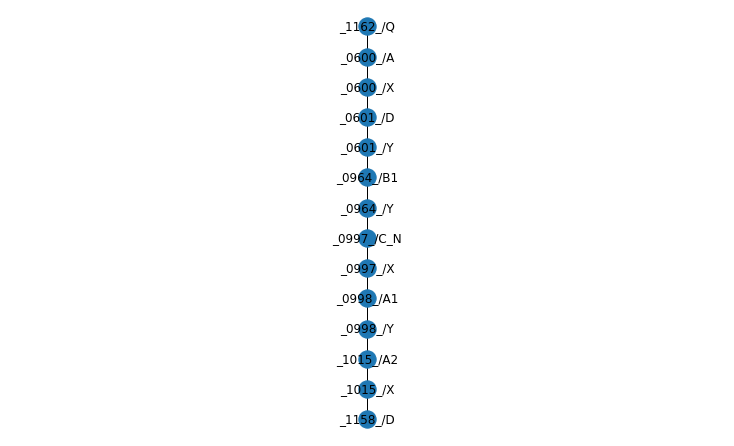

In [15]:
plt.figure(figsize=(10, 6))
timing_path_entity.plot()

#### Accessing Timing Point Details

To retrieve and display information about the timing points in a timing path, the nodes of the `timing_path_entity` are iterated over, and details of each timing point are collected into a DataFrame.

- **Name**: Name of the timing point.
- **Cell delay**: Delay introduced by the cell at this timing point.
- **Arrival time**: Arrival time of the signal at this timing point.
- **Slew**: Transition time of the signal at this timing point.
- **Is rise transition**: Boolean indicating if the transition is a rise.
- **Is fall transition**: Boolean indicating if the transition is a fall.
- **Node depth**: Depth of the node in the timing path.


The resulting DataFrame provides a detailed view of each timing point in the timing path.

In [16]:
import pandas as pd

data = []
for node in timing_path_entity.nodes:
    timing_point_entity = timing_path_entity.nodes[node]["entity"]
    data.append(timing_point_entity.asdict())

pd.DataFrame(data).set_index("name")

,gate,standard_cell,pin,cell_delay,arrival_time,slew,is_rise_transition,is_fall_transition,node_depth
name,,,,,,,,,
_1162_/Q,_1162_,sky130_fd_sc_hd__dfrtp_4,Q,0.489835,0.499835,0.088518,False,True,0
_0600_/A,_0600_,sky130_fd_sc_hd__or4_1,A,0.000000,0.499835,0.088518,False,True,1
_0600_/X,_0600_,sky130_fd_sc_hd__or4_1,X,0.572753,1.072588,0.119142,False,True,2
_0601_/D,_0601_,sky130_fd_sc_hd__nor4_4,D,0.000000,1.072588,0.119142,False,True,3
_0601_/Y,_0601_,sky130_fd_sc_hd__nor4_4,Y,0.207255,1.279843,0.265554,True,False,4
_0964_/B1,_0964_,sky130_fd_sc_hd__o21ai_2,B1,0.000000,1.279843,0.265554,True,False,5
_0964_/Y,_0964_,sky130_fd_sc_hd__o21ai_2,Y,0.110756,1.390598,0.083221,False,True,6
_0997_/C_N,_0997_,sky130_fd_sc_hd__or3b_2,C_N,0.000000,1.390598,0.083221,False,True,7
_0997_/X,_0997_,sky130_fd_sc_hd__or3b_2,X,0.247066,1.637664,0.093319,True,False,8


### Working with Graph and Tabular Data

EDA-schema provides flexibility in working with both graph and tabular data formats. Graph entities are ideal for graph operations like traversals, while tabular data is beneficial for relational operations such as joins, groups, and filters. All entity attributes are available in a tabular format as pandas DataFrames, which allows for efficient data manipulation and analysis.

#### Accessing Tabular Data

Entity attributes can be accessed in a tabular format using the `get_table_data` method from the `MongoDB` object. Here is how to retrieve the tabular data for netlists:

In [17]:
# Accessing all netlists data in tabular format
netlists_data = dataset.db.get_table_data("netlists")
netlists_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,ac97_ctrl,id-000001,floorplan,538.24,538.24,84.0,48.0,9827.0,6122.0,31.0,0.114196,0.266588,0.071141
1,ac97_ctrl,id-000001,global_place,538.24,538.24,84.0,48.0,9827.0,6122.0,31.0,0.114196,0.266588,0.071141
2,ac97_ctrl,id-000001,detailed_place,538.24,538.24,84.0,48.0,9943.0,6239.0,33.0,0.109129,0.254335,0.068476
3,ac97_ctrl,id-000001,cts,538.24,538.24,84.0,48.0,10305.0,6601.0,35.0,0.104950,0.243375,0.067227
4,ac97_ctrl,id-000001,global_route,538.24,538.24,84.0,48.0,10375.0,6664.0,36.0,0.104826,0.242791,0.067331


The resulting `netlists_data` is a pandas DataFrame containing all the attributes of the netlists in a tabular format.

#### Filtering Tabular Data

Tabular data can be filtered based on specific conditions. For example, to filter netlists by the "detailed_route" phase:

In [18]:
# Filtering netlists data by the "route" phase
netlists_route_data = dataset.db.get_table_data("netlists", phase="detailed_route")
netlists_route_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,ac97_ctrl,id-000001,detailed_route,538.240,538.240,84.0,48.0,36961.0,6664.0,36.0,0.104826,0.242791,0.067331
1,aes_core,id-000001,detailed_route,665.965,665.965,259.0,129.0,63102.0,13751.0,34.0,0.135906,0.348343,0.095082
2,des3_area,id-000001,detailed_route,325.440,325.440,240.0,64.0,14980.0,3889.0,38.0,0.141109,0.362127,0.104847
3,i2c,id-000001,detailed_route,190.415,190.415,19.0,14.0,4572.0,728.0,27.0,0.134386,0.297505,0.083333
4,mem_ctrl,id-000001,detailed_route,517.670,517.670,115.0,152.0,35988.0,6148.0,29.0,0.130291,0.291159,0.083034


To filter netlists by the "detailed_route" phase for "aes_core" circuits.

In [19]:
# Filtering netlists data by the "route" phase
netlists_route_data = dataset.db.get_table_data("netlists", phase="detailed_route", circuit="aes_core", netlist_id="id-000001")
netlists_route_data.head()

,circuit,netlist_id,phase,width,height,no_of_inputs,no_of_outputs,no_of_cells,no_of_nets,utilization,cell_density,pin_density,net_density
0,aes_core,id-000001,detailed_route,665.965,665.965,259.0,129.0,63102.0,13751.0,34.0,0.135906,0.348343,0.095082


### Combining Graph and Tabular Data Operations

By combining graph operations and tabular data manipulations, comprehensive analysis and optimization of digital circuit designs can be performed. Graph operations are useful for understanding the connectivity and traversals within the circuit, while tabular data manipulations help in aggregating, grouping, and filtering data to derive meaningful insights.

This approach leverages the strengths of both graph and relational data models, providing a powerful toolkit for analyzing and optimizing digital circuits using EDA-schema.